<a href="https://colab.research.google.com/github/taeheonkwon/Streamlit_Chatbot/blob/main/Clova_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2023년 3월 27일 월요일 작성

클로바 챗봇 invoke url = 중간연결 url

https://clovachatbot.ncloud.com/**************


시크릿키 


a******************



chatbot_api_kr API 목록에서 얻은 URL 복사
https://******************

#기본 챗봇 작성 방법

1. 도메인 생성하기

    콘솔 > AI Services > CLOVA Chatbot > 도메인 생성 버튼 클릭

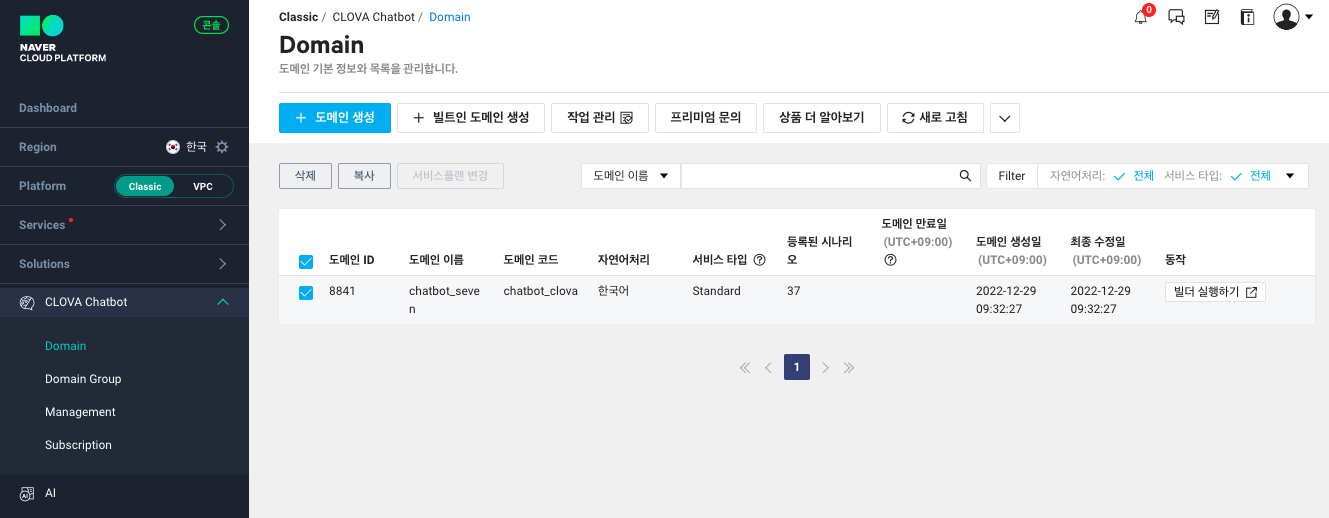

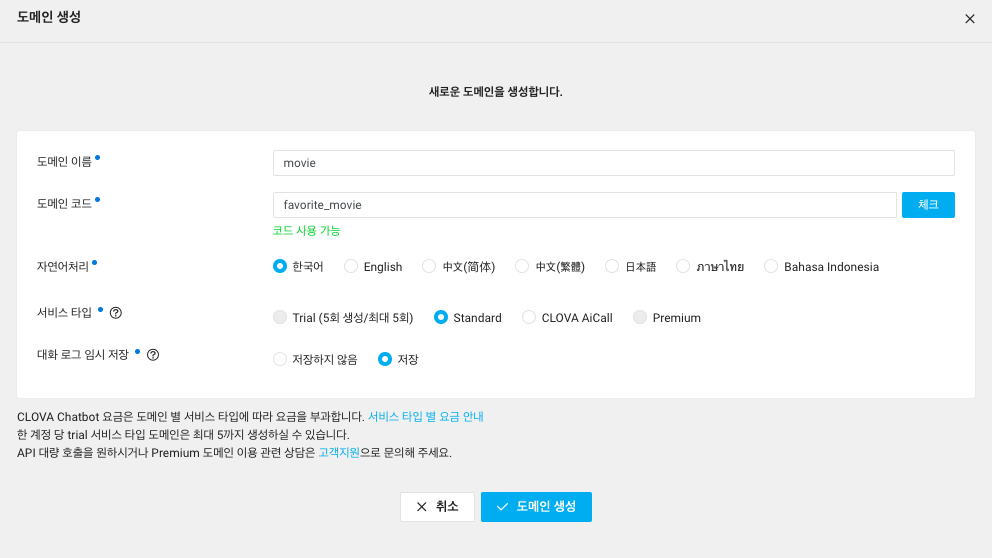

2. 빌더실행하기

    아래 화면에서 빌더실행하기 버튼 클릭

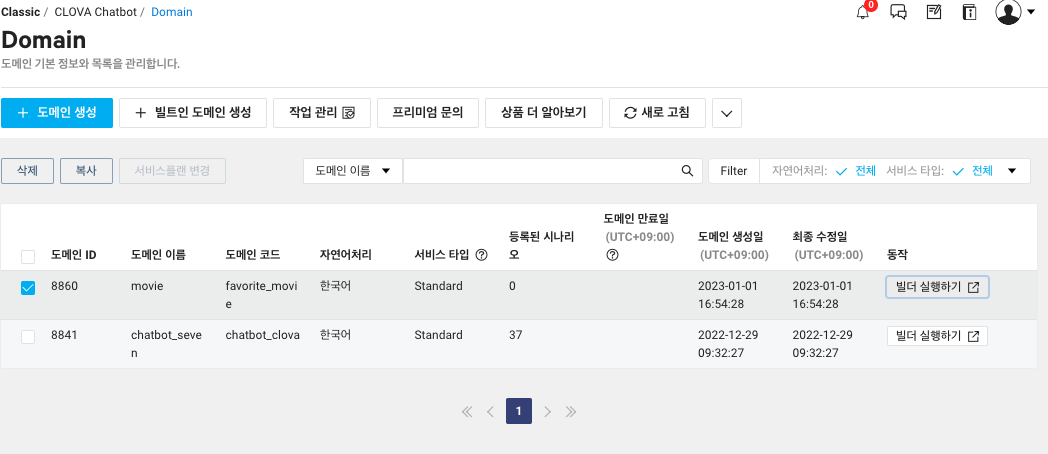

3. 대화 목록 선택

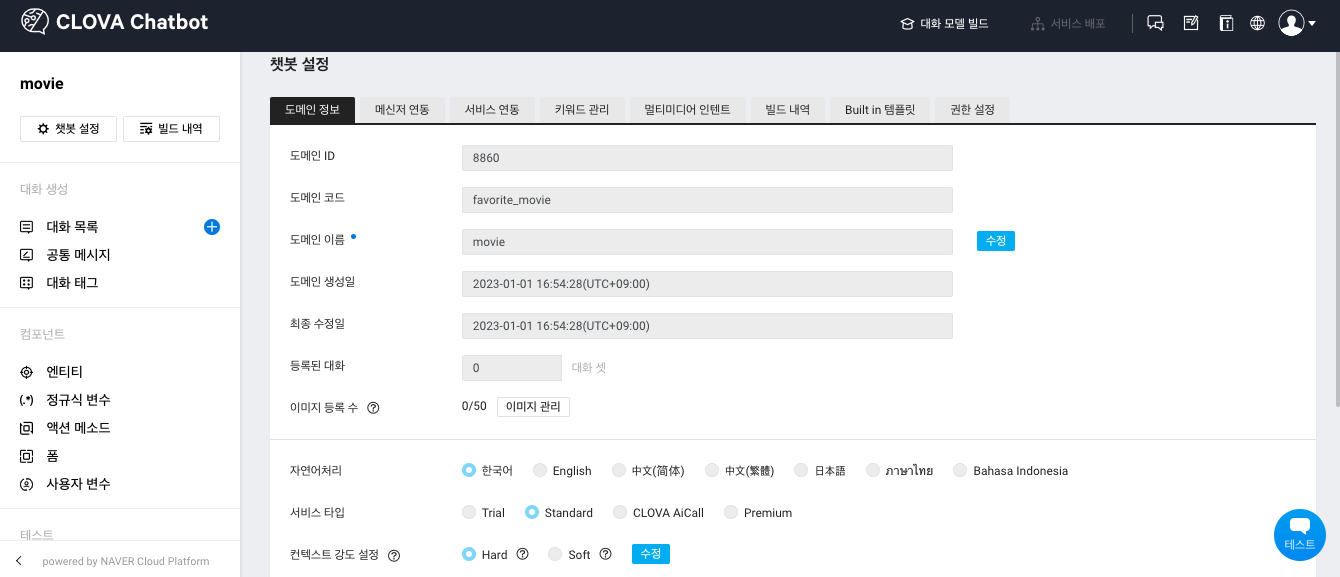

4. 대화생성

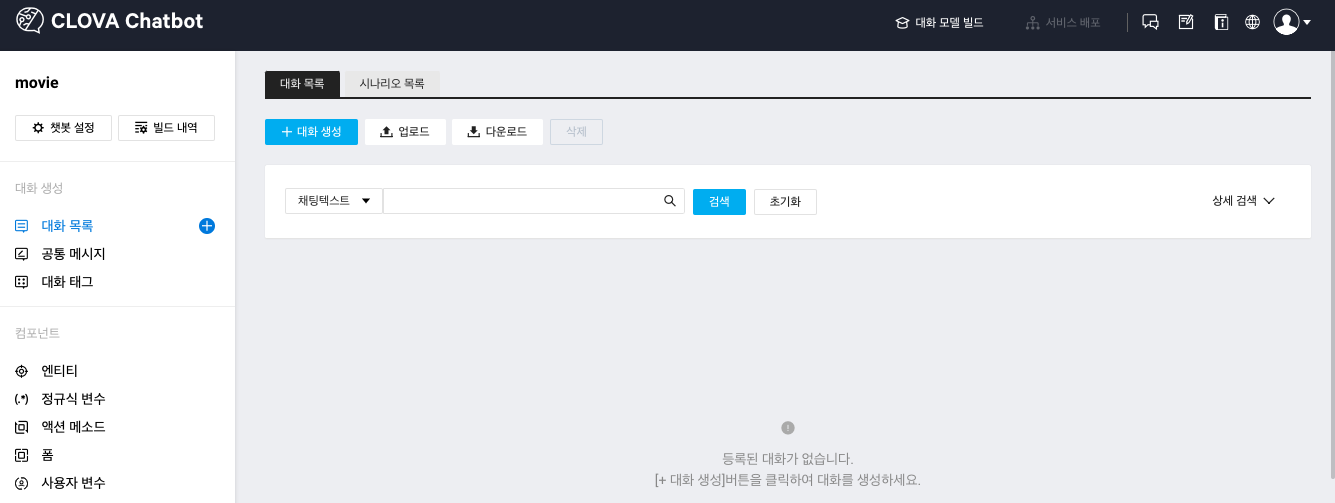

4. 대화목록 추가 하기

    대화는 단순히 질문,  답변, 태그, 대화위치(단일대화)만 등록해도 된다.

    AI가 학습할수 있도록 대화의 갯수는 3개 이상이 되어야 한다. 

    공통메시지, 엔티티, 정규식 변수, 액션 메소드, 폼, 사용자 변수 등은 작성하지 않아도 된다. 

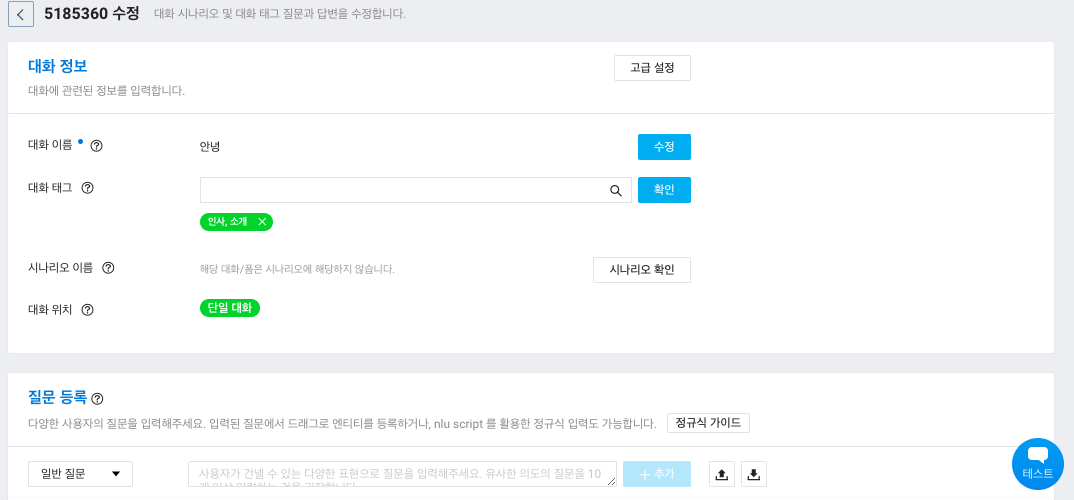

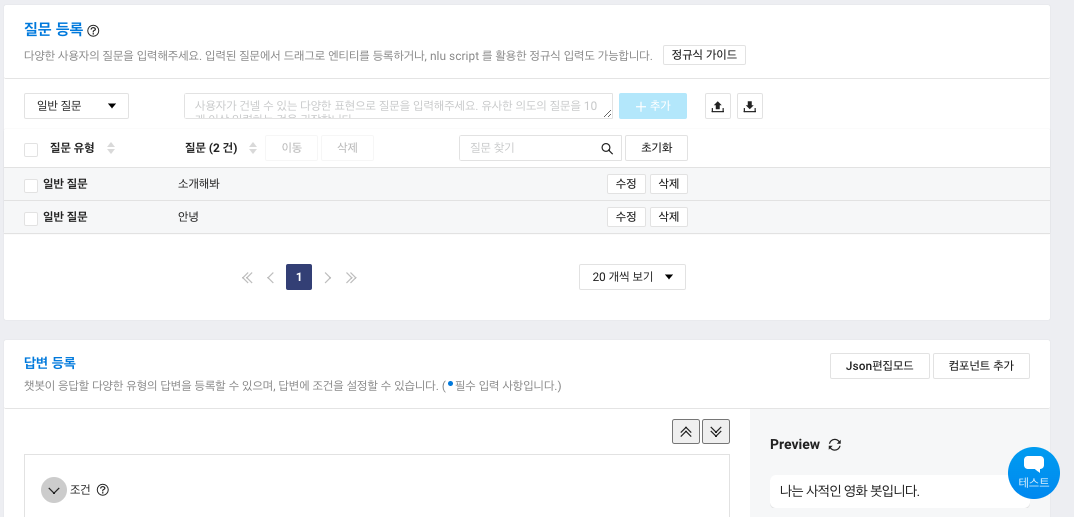

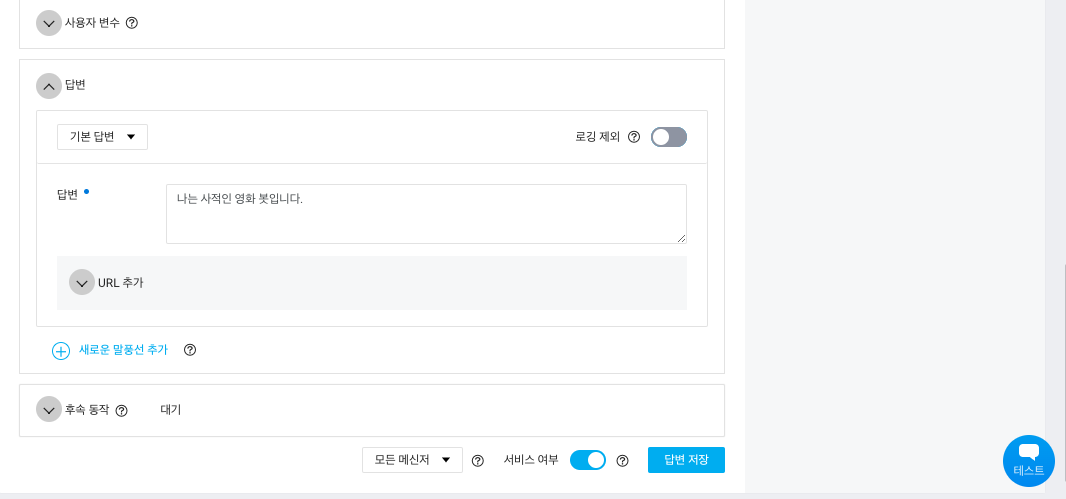

5. 대화 모델 빌드 버튼을 클릭해 빌드 시킨다(AI 를 학습)

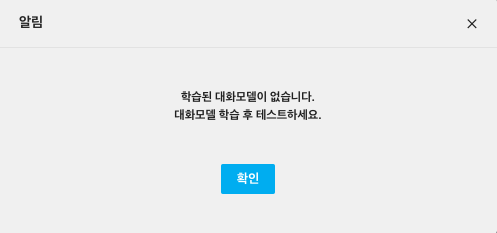

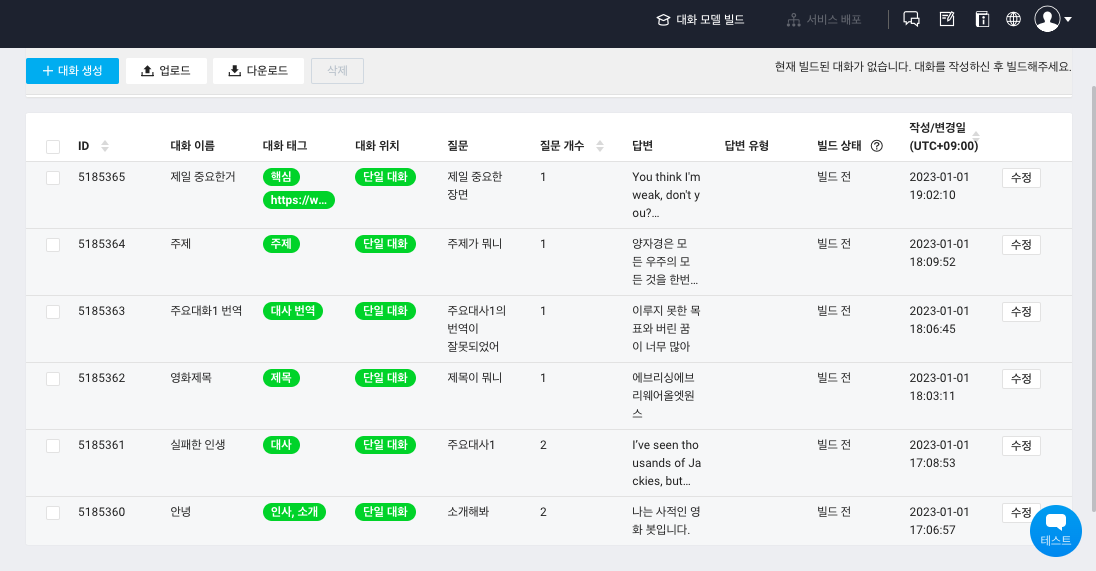






6. 테스트 화면에서 실제 대화를 테스트 해본다. 

    빌드가 끝나면 서비스 배포 버튼이 활성화 되어 누를 수 있는 상태가 될것이다. 
    
    버튼을 눌러 서비스 상태로 만든다.

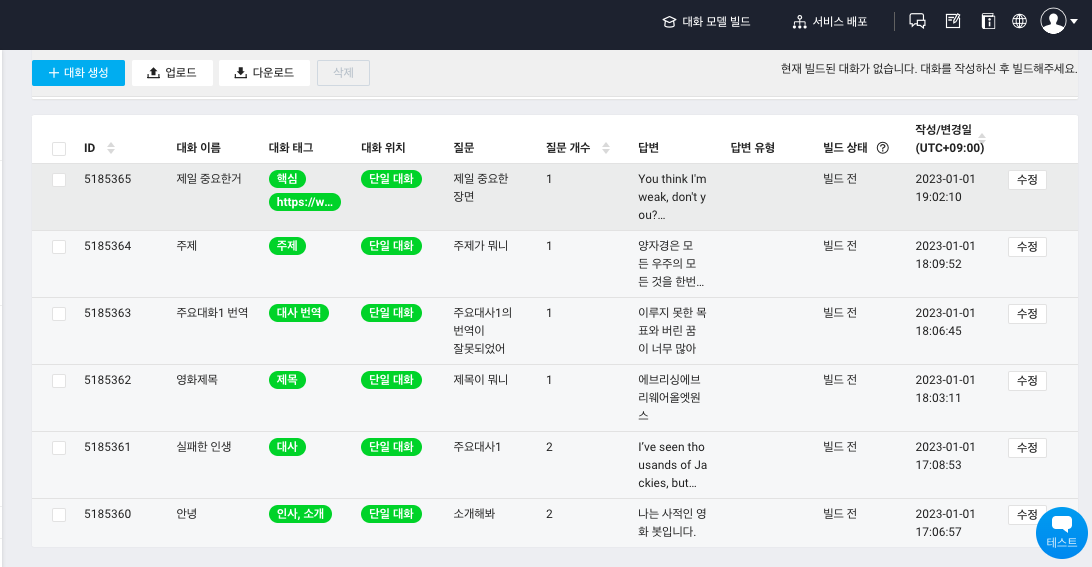

7. 이제 streamlit에 clova chatbot을 연결 해야 한다. 다음과 같은 두가지 과정을 거친다.

    A. CLOVA Chatbot 서비스에서 Custom API 연동 하기

    B. API Gateway 서비스에서 API Gateway 기본 연동 하기

    

A. CLOVA Chatbot 서비스에서 Custom API 연동하기

1. 빌더실행하기 버튼 눌렀을때 열리는 브라우저 창에서 -> 메신저 연동 선택 

2. Custom API Gateway와 End-point 연결이 필요합니다. 항목을 실행

3. APIGW 수동 연동 선택

4. APIGW Configuration  항목에서 "다운로드" 버튼을 눌러 "chatbot_messenger_swagger_2.0.json" 파일 다운 로드

5. CLOVA Chatbot Invoke URL : ****************** 를 주소 복사하여 별도 저장

6. Secret Key: ******************를 생성하여 별도 저장

7. 연동 버튼 클릭 하여 작업 완료

B. API Gateway 서비스에서 API Gateway 기본 연동

- 해당 과정은 https://guide.ncloud-docs.com/docs/chatbot-chatbot-5-1  페이지에 나와 있는 매뉴얼에서 "수동 연동 설정" 부터 "API 배포"까지를 수행하면 된다. 
1. API 생성


실제 화면

API Gateway 서비스가 applications 로 이동 했기 때문에 My Products 경로가 이미지와 다를 수 있다. 그래서 검색으로 해서 찾아 들어갔다. 

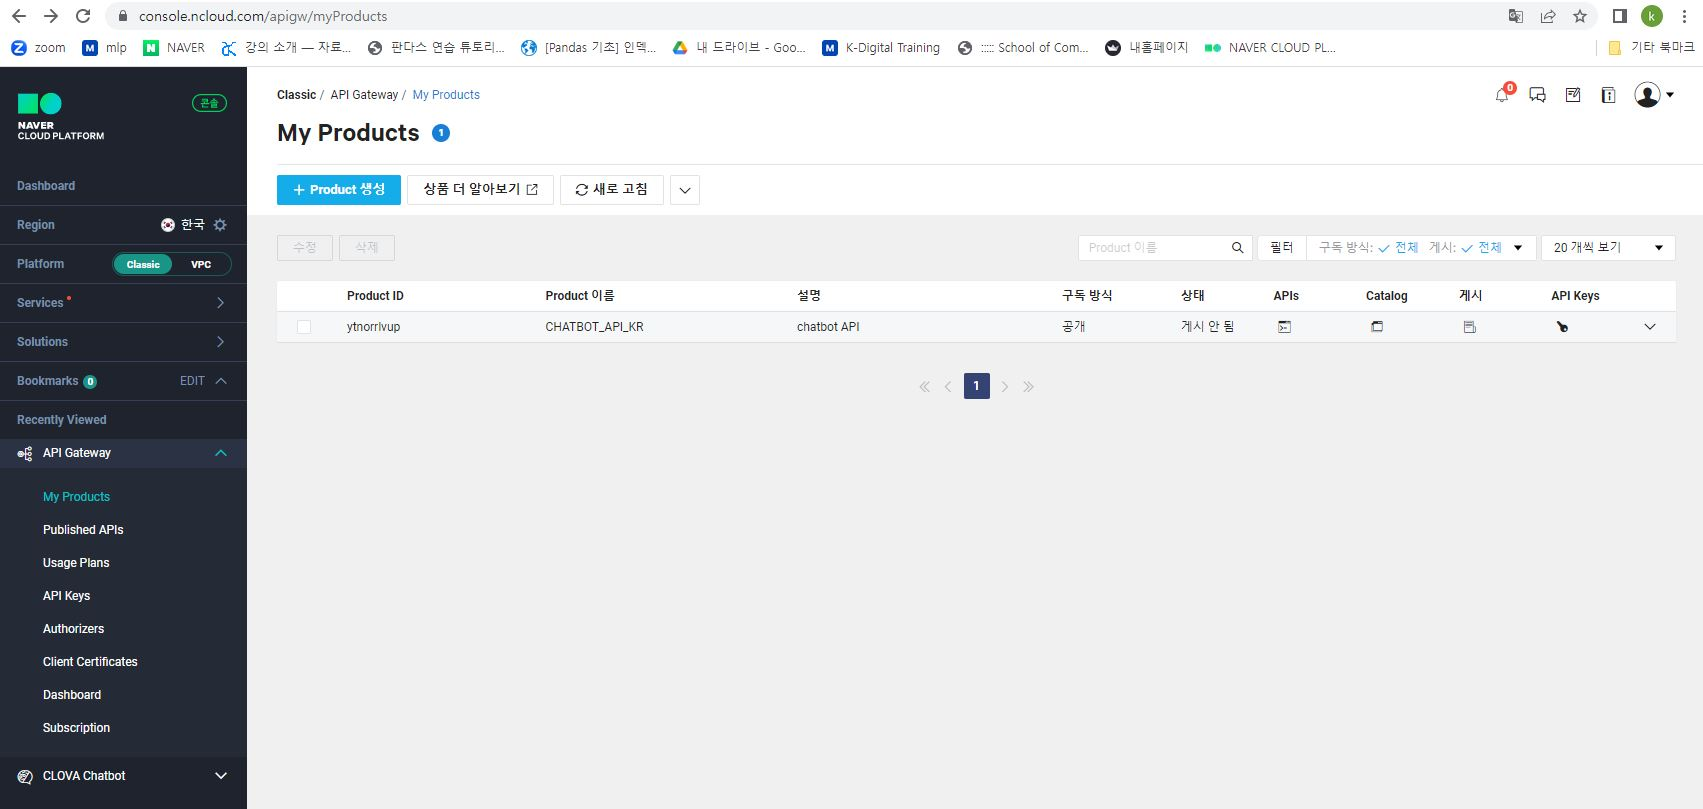

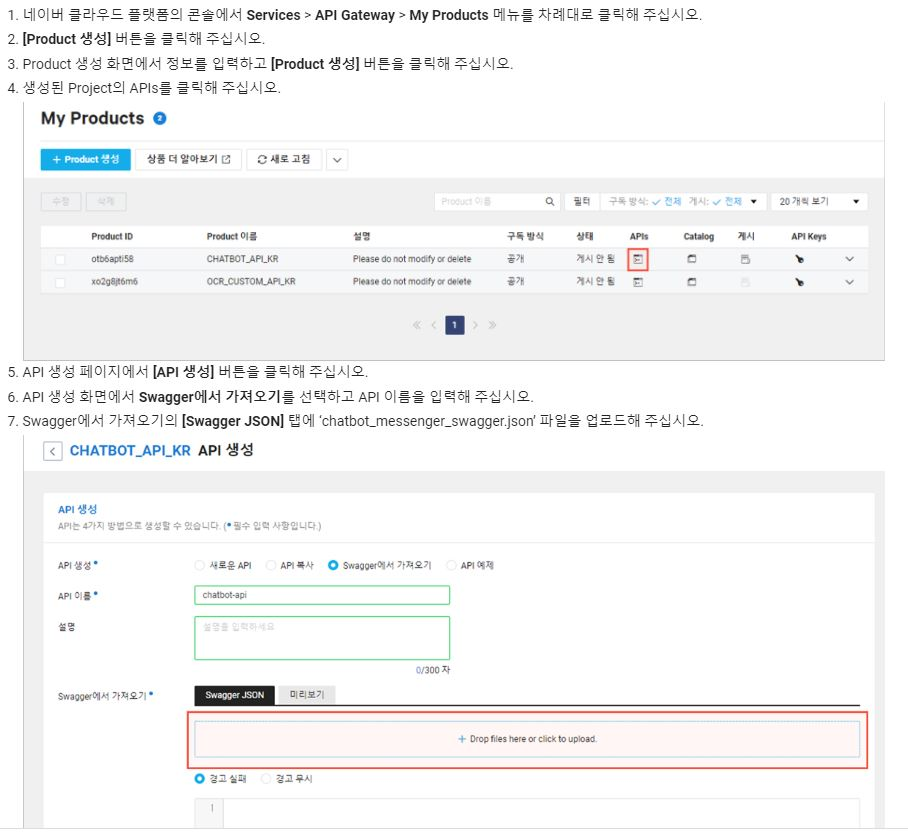

A 과정에서 다운 받은 "chatbot_messenger_swagger_2.0.json" 파일을 업로드 하고 **[API 생성]** 버튼을 클릭합니다. 

2. Stages API 생성

여기에 넣을 invoke URL 은 custom  API 연동하기에서 복사한 CLOVA Chatbot Invoke URL : ****************** 이다. 

이때, 잘못된 형식입니다라는 붉은색 글씨가 나타나면 당황하지 말고, 컴퓨터의 클립보드를 비우고,  복사해 놓은 URL을 다시한번 복사해 온다. 

이것이 안된다고 custom API 설정 과정으로 돌아가서 URL을 복사해오면 이미 키값이 바뀐 상태여서 틀린 URL 이라고 오류가 난다. 

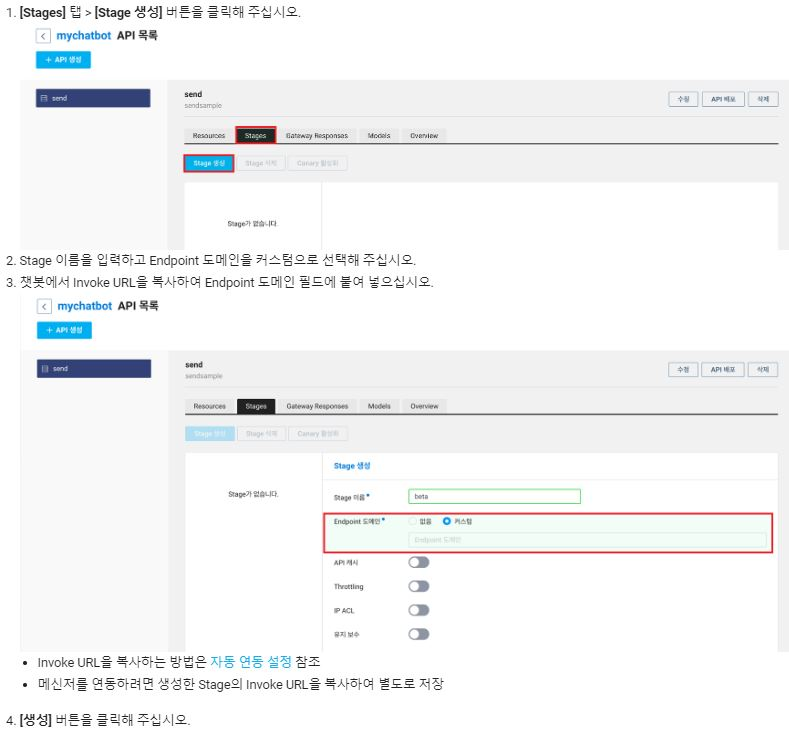

3. API 배포

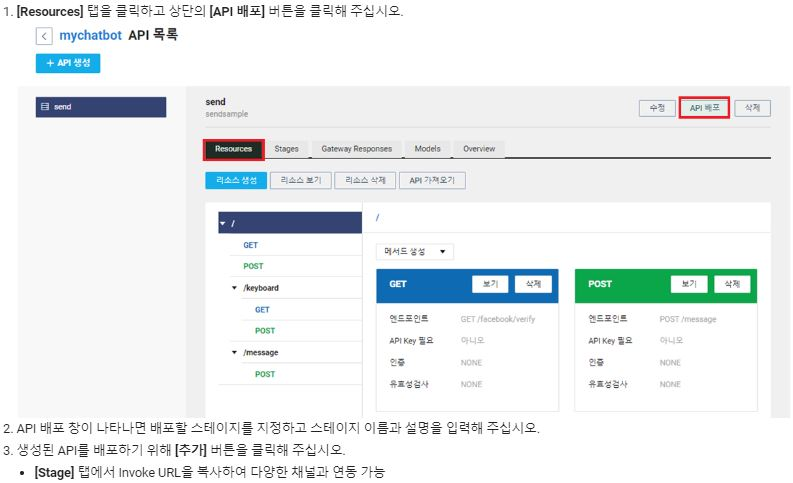

api 배포시 참조 화면

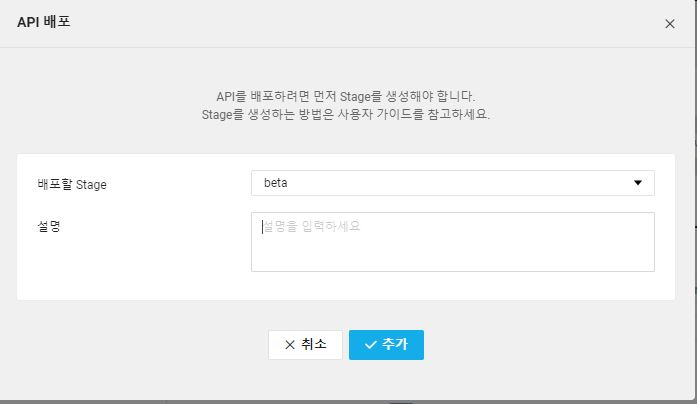

실제 화면

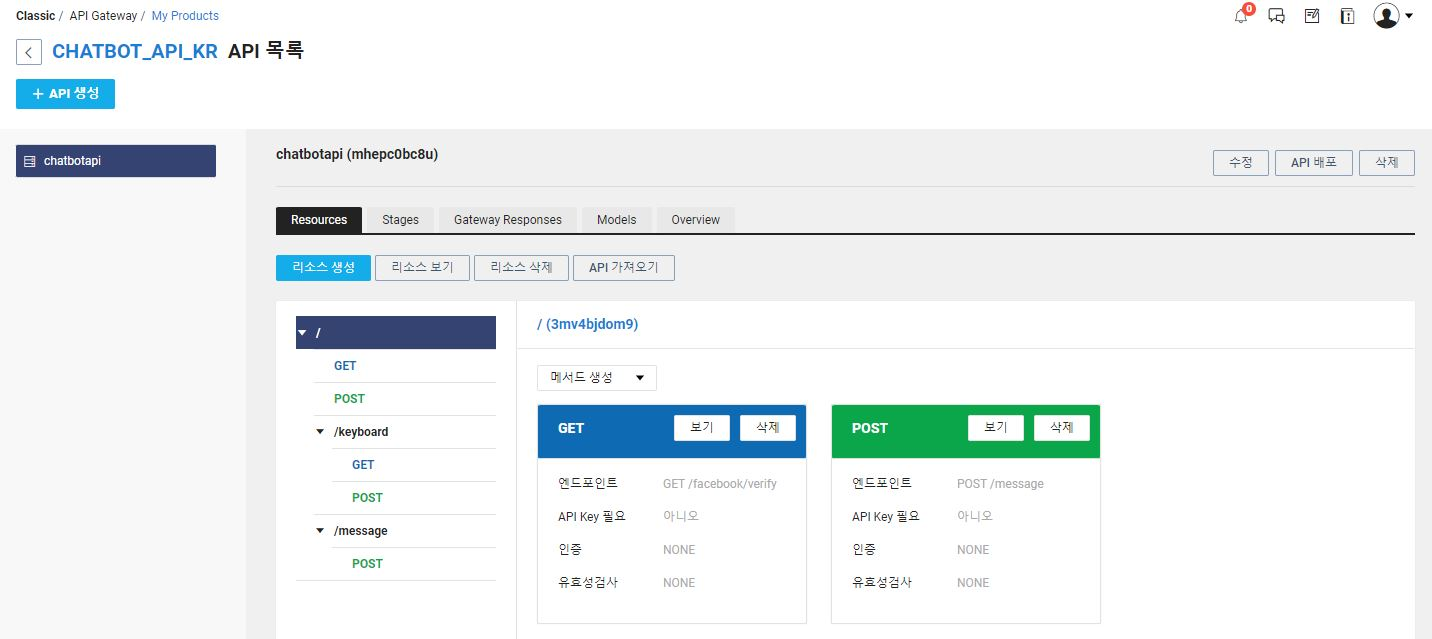

# Invoke URL 복사 : API Gateway 서비스의 Stages

실제 클라이언트 프로그램에서 사용할 Invoke URL 이 네이버 매뉴얼에는 잘못 기재 되어 있기 때문에 유의하여 복사한다. 

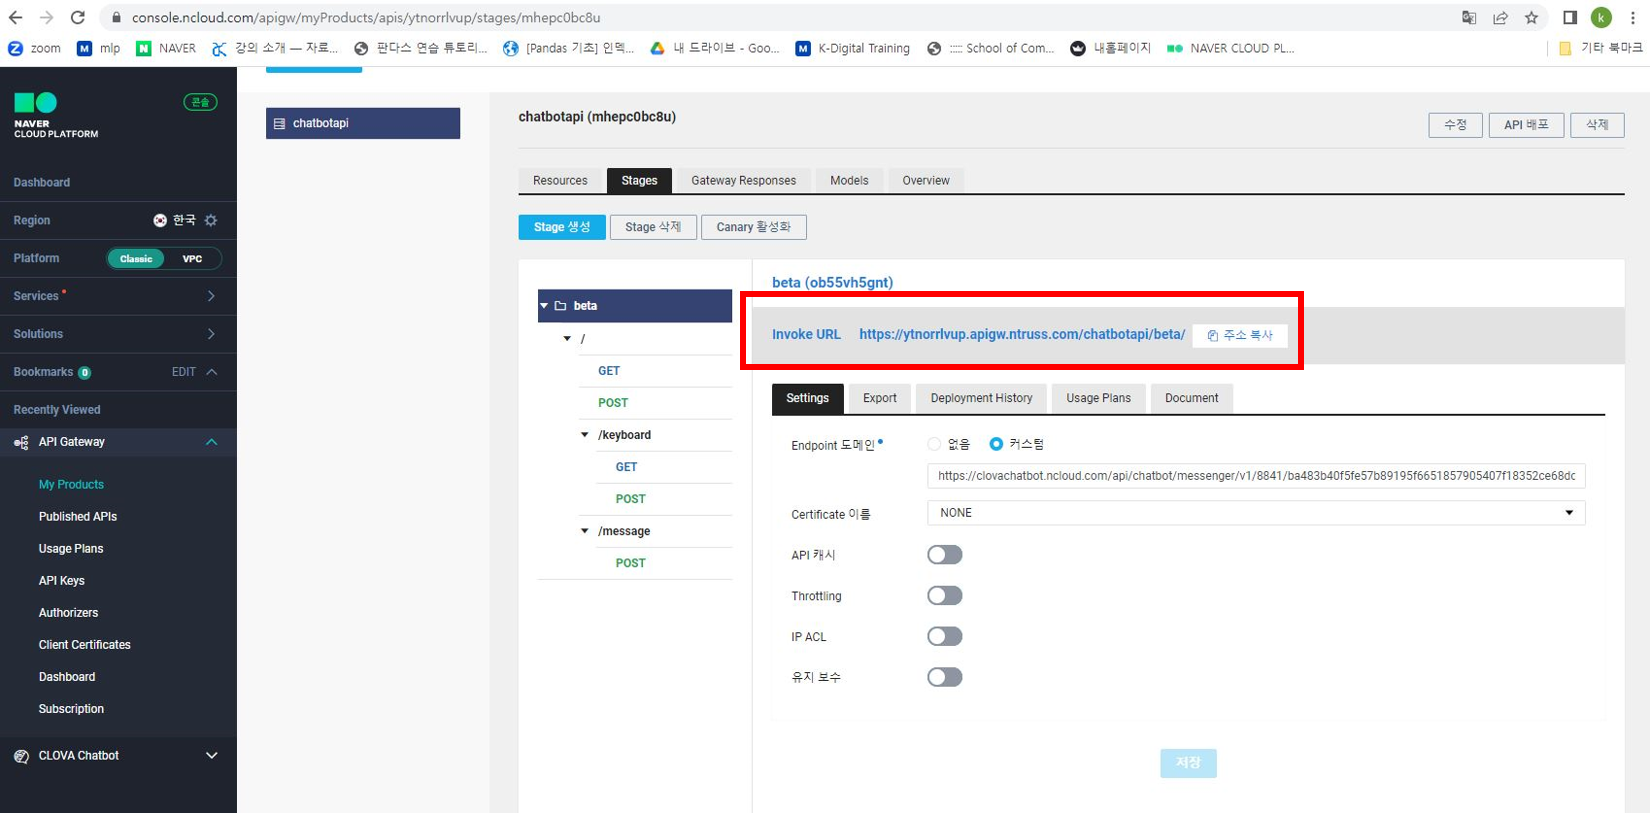

In [ ]:
import hashlib
import hmac
import base64
import time
import requests
import json


class ChatbotMessageSender:

    # chatbot api gateway url
    ep_path = '******************'
    # chatbot custom secret key
    secret_key = '******************'

    def req_message_send(self):

        timestamp = self.get_timestamp()
        request_body = {
            'version': 'v2',
            'userId': 'instructor3',
            'timestamp': timestamp,
            'bubbles': [
                {
                    'type': 'text',
                    'data': {
                        'description': '주소는'
                    }
                }
            ],
            'event': 'send'
        }

        ## Request body
        encode_request_body = json.dumps(request_body).encode('UTF-8')

        ## make signature
        signature = self.make_signature(self.secret_key, encode_request_body)

        ## headers
        custom_headers = {
            'Content-Type': 'application/json;UTF-8',
            'X-NCP-CHATBOT_SIGNATURE': signature
        }

        print("## Timestamp : ", timestamp)
        print("## Signature : ", signature)
        print("## headers ", custom_headers)
        print("## Request Body : ", encode_request_body)

        ## POST Request
        response = requests.post(headers=custom_headers, url=self.ep_path, data=encode_request_body)

        return response

    @staticmethod
    def get_timestamp():
        timestamp = int(time.time() * 1000)
        return timestamp

    @staticmethod
    def make_signature(secret_key, request_body):

        secret_key_bytes = bytes(secret_key, 'UTF-8')

        signing_key = base64.b64encode(hmac.new(secret_key_bytes, request_body, digestmod=hashlib.sha256).digest())

        return signing_key


if __name__ == '__main__':


    res = ChatbotMessageSender().req_message_send()

    print(res.status_code)
    if(res.status_code == 200):
        #print(res.text)
        dict_res = res.json()
        print(dict_res['bubbles'][0]['data']['description'])
        #print(res.read().decode("UTF-8"))

## Timestamp :  1679914073235
## Signature :  b't0YtbLirFBrAvkUPJhhsRUFZP69tmiN02CaCHezgqBI='
## headers  {'Content-Type': 'application/json;UTF-8', 'X-NCP-CHATBOT_SIGNATURE': b't0YtbLirFBrAvkUPJhhsRUFZP69tmiN02CaCHezgqBI='}
## Request Body :  b'{"version": "v2", "userId": "instructor3", "timestamp": 1679914073235, "bubbles": [{"type": "text", "data": {"description": "\\uc8fc\\uc18c\\ub294"}}], "event": "send"}'
200
컴퓨터 안에 있습니다.


수동연동

In [ ]:
res

<Response [200]>

In [ ]:
res.text

'{"version":"v2","userId":"instructor3","timestamp":1679914074087,"bubbles":[{"type":"text","data":{"description":"컴퓨터 안에 있습니다."},"information":[{"key":"chatType","value":"TEXT"},{"key":"chatType","value":"TEXT"},{"key":"score","value":"0.7025766204532824"},{"key":"scenarioName","value":"주소"},{"key":"endOfBubble","value":"endOfBubble"},{"key":"clovaDirectiveHeader-name-CallDetailRecord","value":"CallDetailRecord"},{"key":"clovaDirectivePayload-intentClassificationResult-CallDetailRecord","value":"{\\"intent\\":\\"\\",\\"valid\\":false,\\"originalResponse\\":\\"\\"}"},{"key":"matchingType","value":"model"},{"key":"domainCode","value":"fmss"}],"context":[]}],"scenario":{"name":"주소","chatUtteranceSetId":5244912,"intent":[]},"entities":[],"keywords":[],"conversation":{"scenarioName":"주소","chatUtteranceSetId":5244912,"types":[]},"normalizer":"null","event":"send"}'

In [ ]:
dict_res = res.json()

In [ ]:
dict_res['bubbles'][0]['data']['description']

'컴퓨터 안에 있습니다.'

In [ ]:
import hashlib
import hmac
import base64
import time
import requests
import json


class ChatbotMessageSender:

    # chatbot api gateway url
    ep_path = '******************'
    # chatbot custom secret key
    secret_key = '******************'

    def req_message_send(self, i_text):

        timestamp = self.get_timestamp()
        request_body = {
            'version': 'v2',
            'userId': 'instructor3',
            'timestamp': timestamp,
            'bubbles': [
                {
                    'type': 'text',
                    'data': {
                        'description': i_text
                    }
                }
            ],
            'event': 'send'
        }

        ## Request body
        encode_request_body = json.dumps(request_body).encode('UTF-8')

        ## make signature
        signature = self.make_signature(self.secret_key, encode_request_body)

        ## headers
        custom_headers = {
            'Content-Type': 'application/json;UTF-8',
            'X-NCP-CHATBOT_SIGNATURE': signature
        }

        print("## Timestamp : ", timestamp)
        print("## Signature : ", signature)
        print("## headers ", custom_headers)
        print("## Request Body : ", encode_request_body)

        ## POST Request
        response = requests.post(headers=custom_headers, url=self.ep_path, data=encode_request_body)

        return response

    @staticmethod
    def get_timestamp():
        timestamp = int(time.time() * 1000)
        return timestamp

    @staticmethod
    def make_signature(secret_key, request_body):

        secret_key_bytes = bytes(secret_key, 'UTF-8')

        signing_key = base64.b64encode(hmac.new(secret_key_bytes, request_body, digestmod=hashlib.sha256).digest())

        return signing_key


if __name__ == '__main__':
    input_text = '나이'
    res_obj = ChatbotMessageSender()
    res = res_obj.req_message_send(input_text)

    print(res.status_code)
    if(res.status_code == 200):
        #print(res.text)
        dict_res = res.json()
        print(dict_res['bubbles'][0]['data']['description'])
        #print(res.read().decode("UTF-8"))

## Timestamp :  1679917773419
## Signature :  b'cTXzQZ728aDTxfMTAg0d06v0evxi9xxYU03XdTOTU+Y='
## headers  {'Content-Type': 'application/json;UTF-8', 'X-NCP-CHATBOT_SIGNATURE': b'cTXzQZ728aDTxfMTAg0d06v0evxi9xxYU03XdTOTU+Y='}
## Request Body :  b'{"version": "v2", "userId": "instructor3", "timestamp": 1679917773419, "bubbles": [{"type": "text", "data": {"description": "\\ub098\\uc774"}}], "event": "send"}'
200
얼마안되요


실제 웹에 표출하기 위해 사용한 streamlit 코드들

https://github.com/jaesik103/ChatBot/blob/main/kobart_chit_chat_stream5.py

In [ ]:
    if 'past' not in st.session_state: # 내 입력채팅값 저장할 리스트
        st.session_state['past'] = [] 

    if 'generated' not in st.session_state: # 챗봇채팅값 저장할 리스트
        st.session_state['generated'] = []
    

    placeholder = st.empty() # 채팅 입력창을 아래위치로 내려주기위해 빈 부분을 하나 만듬
    
    with st.form('form', clear_on_submit=True): # 채팅 입력창 생성
        user_input = st.text_input('당신: ', '') # 입력부분
        submitted = st.form_submit_button('전송') # 전송 버튼
    
    
    if submitted and user_input:
        user_input1 = user_input.strip() # 채팅 입력값 및 여백제거
        chatbot_output1 = model.chat(user_input1).strip() # text generation된 값 및 여백 제거
        st.session_state.past.append(user_input1) # 입력값을 past 에 append -> 채팅 로그값 저장을 위해
        st.session_state.generated.append(chatbot_output1)
    
    with placeholder.container(): # 리스트에 append된 채팅입력과 로봇출력을 리스트에서 꺼내서 메세지로 출력
        for i in range(len(st.session_state['past'])):
            message(st.session_state['past'][i], is_user=True, key=str(i) + '_user')
            if len(st.session_state['generated']) > i:
                message(st.session_state['generated'][i], key=str(i) + '_bot')

NameError: ignored

    placeholder = st.empty()

    with placeholder.container():
        st.write('One')
        st.write('Two')

이 사용법은 app에 요소들을 계속 추가하고 유지해 주는 역활을 한다.


https://docs.streamlit.io/library/api-reference/layout/st.empty

#HTTP에서 사용하는 인증 방법


## 익명
익명 요청은 인증정보를 포함하지 않는 요청을 말합니다. 리소스에 대한 모든 액세스 권한을 부여하는 것과 같습니다.

## BASIC 인증
기본 인증은 클라이언트에 대한 사용자 이름과 암호를 Base64로 인코딩 된 문자열을 보냅니다.
간편하며 널리 쓰이나 패킷 도청에 취약합니다.
리소스 보안을 강하게 해야 할 경우 다른 인증방식을 사용하는 것이 좋습니다.

## DIGEST 인증
사용자명, 패스워드 등을 조합하여 MD5 값으로 인증합니다. 기본 인증보다 보안이 강화된 인증방식입니다.

1. 클라이언트 - 페이지 요청
2. 서버 - digest 인증 필요하다고 통보
3. 클라이언트 - 사용자가 아이디/패스워드 입력하면, 서버정보+클라이언트 정보 병합 후 MD5로 암호화 하여 전송
Digest 인증방식에서 서버는 클라이언트로 단순히 패스워드를 받는것이 아니고 조합된 MD5로 해시된 값을 받습니다.

### MD5란?
Message-Digest algorithm 5

128비트 암호화 해시함수
암호화, 체크섬 무결성 검사 등에 사용된다.
임의의 길이 문자열 입력 -> 128비트 문자열 출력
[root@zetawiki ~]# echo -n 'hello world' | md5sum
5eb63bbbe01eeed093cb22bb8f5acdc3 -
-> 16진수 문자열로는 32자

## SSL 클라이언트 인증
유저 ID와 패스워드를 사용한 인증방식은 이 두가지 정보가 정확하다면 본인으로서 인증할 수 있습니다.
그러나 이 정보가 도난됐을 때 제 3자가 접근을 할 수 있습니다.
이를 방지하기 위한 대책중의 하나가 바로 이 SSL 클라이언트 인증입니다.
HTTPS의 클라이언트 인증서를 사용하여 인증하는 방식입니다.

SSL클라이언트 인증의 경우 단독으로 사용되지 않고 아래 다룰 폼베이스 인증과 합쳐져서 이용되고 있습니다.

단점으로 클라이언트 증명서 구입비용 혹은 서버의 운영자 자신이 인증 기관을 만들어서 안전하게 운영하기 위해 들어가는 비용 등이 매우 많이 필요합니다.

## 폼 베이스 인증
인증의 대부분은 폼 베이스 인증입니다.
HTTP가 표준으로 제공하는 BASIC, DIGEST인증은 사용상의 문제, 보안적인 문제로 거의 사용되고 있지 않습니다.
SSL클라이언트 인증도 도입 비용이나 운용비용의 문제로 거의 사용하고 있지 않습니다.

폼 베이스 인증은 HTTP 프로토콜로서 사양이 정의되어 있는 인증 방식이 아닙니다.
클라이언트가 자격 정보를 송신하여 검증 결과에 따라 인증을 하는 방식입니다. 그래서 웹 애플리케이션 마다 제공되는 인터페이스나 인증의 방법이 다양합니다.



'''
로그인 필드 

폼 베이스 로그인필드
'''



하지만
폼 베이스 인증의 경우 기능 구현에 대한 표준적인 문서 등이 존재하지 않기 때문에 웹 애플리케이션에서 제각각 구현하는 폼 베이스 인증을 사용해야 합니다.
공통 사양이 없기 때문에 웹 사이트별로 다르게 구현하고 있으며, 안전한 방법으로 구현 시 높은 보안 등급을 유지할 수 있지만 문제있는 구조를 사용하고있는 웹사이트도 종종 발견할 수 있습니다.

표준적인 사양이 없으나 일반적으로 세션관리를 위해 쿠키를 사용하고 있습니다.
HTTP는 스테이트리스 프로토콜이기 때문에 방금 전 인증성공 유저라는 상태를 프로토콜 레벨에서는 유지할 수 없습니다.
즉 상태관리가 안되기 때문에 유저 구분을 위해서 세션 관리와 쿠키를 사용하고 있습니다.